In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from dongnet import dongnet12

In [3]:
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available. Training on CPU ...')
else:
    print('CUDA is available! Training on GPU ...')

CUDA is not available. Training on CPU ...


In [4]:
model = dongnet12()
model_dict = torch.load('int8qmodel.pth', map_location=torch.device('cpu'))  # 상태 사전 로드
model.load_state_dict(model_dict)  # 모델에 상태 사전 로드

<All keys matched successfully>

In [5]:
for name, param in model.named_parameters():
    layername = '.'.join(name.split('.')[:5])
    #print(layername)
    if layername == 'conv2.weight':
        conv2 = param.cpu().detach().numpy()
    elif layername == 'batchnorm2.weight':
        batch2w = param.cpu().detach().numpy()
    elif layername == 'batchnorm2.bias':
        batch2b = param.cpu().detach().numpy()
    elif layername == 'linear_relu.0.weight':
        linear0w = param.cpu().detach().numpy()
    elif layername == 'linear_relu.0.bias':
        linear0b = param.cpu().detach().numpy()

In [7]:
print(conv2)
print(conv2.shape)
print(batch2w.shape)
print(batch2b.shape)
print(linear0w.shape)
print(linear0b.shape)

[[[[ 0.12901531  0.07939404  0.08931829]
   [ 0.11909106  0.07443191  0.09428042]
   [ 0.07939404  0.03969702  0.00496213]]

  [[ 0.02481064  0.09428042  0.1091668 ]
   [ 0.02481064  0.07939404  0.05954553]
   [-0.01984851 -0.01488638  0.01488638]]

  [[-0.09428042 -0.09924255 -0.15878807]
   [-0.15382595 -0.13893956 -0.09428042]
   [-0.01488638 -0.04962127 -0.02481064]]

  ...

  [[-0.04962127  0.09924255  0.00992425]
   [ 0.0545834   0.04962127  0.06450766]
   [ 0.06946978  0.07939404  0.04962127]]

  [[ 0.00992425 -0.05954553 -0.15878807]
   [-0.1091668  -0.0545834  -0.11909106]
   [ 0.09428042  0.19848509  0.19848509]]

  [[-0.09924255 -0.14390169 -0.10420468]
   [-0.06450766 -0.22329573 -0.18856084]
   [-0.14390169 -0.18359871 -0.13397744]]]


 [[[-0.09428042  0.00496213 -0.02481064]
   [-0.03969702  0.07443191 -0.03473489]
   [ 0.01488638 -0.01488638 -0.0545834 ]]

  [[ 0.00496213  0.02481064 -0.01488638]
   [-0.03969702 -0.         -0.        ]
   [-0.07939404 -0.04465915  0.059

In [15]:
print(len(np.unique(conv2)))
print(len(np.unique(batch2w)))
print(len(np.unique(batch2b)))
print(len(np.unique(linear0w)))
print(len(np.unique(linear0b)))
print(np.max(linear0w))
print(np.min(linear0b))
print(np.max(batch2w))
print(np.min(batch2w))
print(np.max(batch2b))
print(np.min(batch2b))

169
52
54
221
185
0.18964581
-0.12712695
1.1895832
0.7616029
0.20145257
-0.44625568


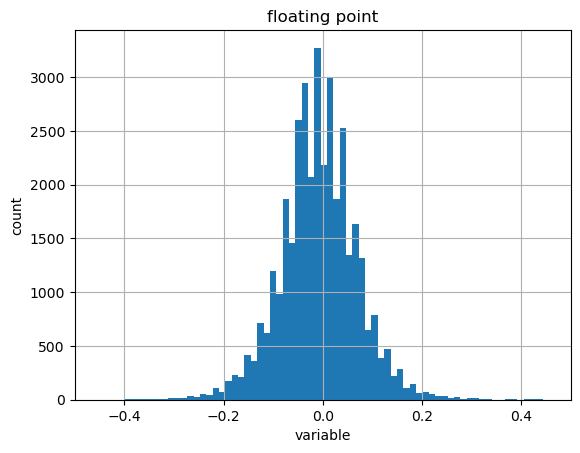

In [12]:
plt.hist(conv2.flatten(), bins=100)
plt.xlabel('variable')
plt.ylabel('count')
plt.xlim([-0.5, 0.5])
plt.title('floating point')
plt.grid()

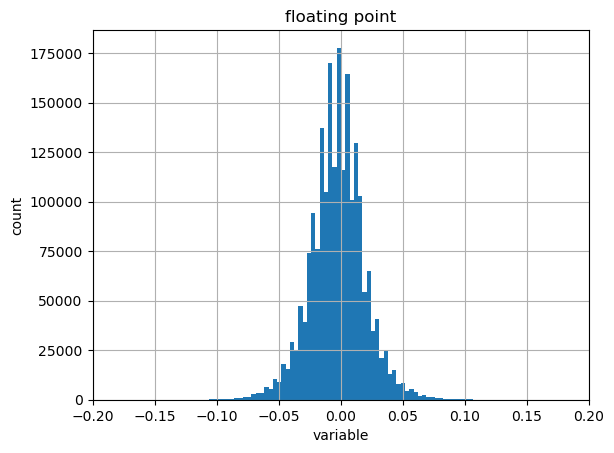

In [11]:
plt.hist(linear0w.flatten(), bins=100)
plt.xlabel('variable')
plt.ylabel('count')
plt.xlim([-0.2, 0.2])
plt.title('floating point')
plt.grid()

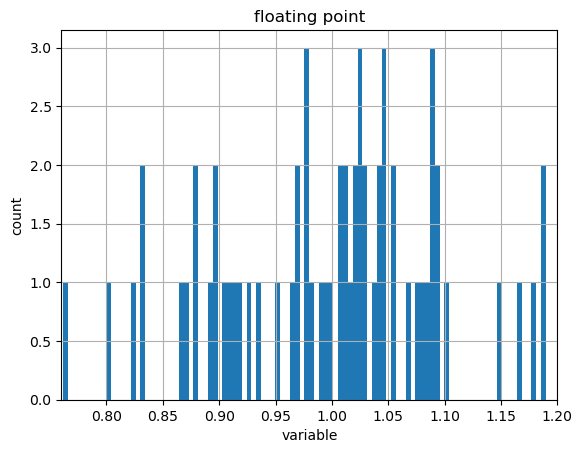

In [16]:
plt.hist(batch2w.flatten(), bins=100)
plt.xlabel('variable')
plt.ylabel('count')
plt.xlim([0.76, 1.2])
plt.title('floating point')
plt.grid()

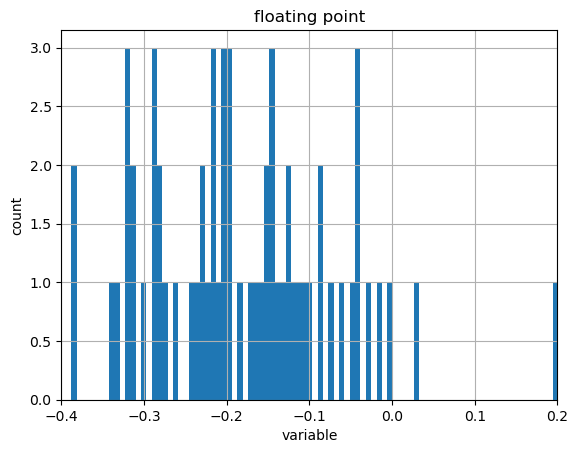

In [17]:
plt.hist(batch2b.flatten(), bins=100)
plt.xlabel('variable')
plt.ylabel('count')
plt.xlim([-0.4, 0.2])
plt.title('floating point')
plt.grid()